# 3. Plotting arrays

Arrays can represent any type of numeric data, typical examples being e.g. time-series (1D), images (2D) etc. Very often it is helpful to visualize such arrays either while developing an analysis pipeline or as an end-result. We show here briefly how this visualization can be done using the Matplotlib library. That library has extensive capabilities and we present here a minimal set of examples to help you getting started. Note that we will see other libraries when exploring Pandas in the next chapters that are more specifically dedicated to data science.

All the necessary plotting functions reside in the ```pyplot``` module of Matplotlib. ```plt``` contains for example all the functions for various plot types:
- plot an image: ```plt.imshow()```
- line plot: ```plt.plot```
- plot a histogram: ```plt.hist()```
- etc.

Let's import it with it's standard abbreviation ```plt``` (as well as numpy):

In [1]:
import matplotlib.pyplot as plt
import numpy as np

## 3.1 Data

We will use here Numpy to generate synthetic data to demonstrate plotting. We create an array for time, and then transform that array with a sine function. Finally we make a second version where we add some noise to the data:

In [2]:
# time array 
time = np.arange(0,20,0.5)
# sine function
time_series = np.sin(time)
# sine function plus noise
time_series_noisy = time_series + np.random.normal(0,0.5,len(time_series))

## 3.2 General concepts

We are going to see in the next sections a few example of important plots and how to customize them. However we start here by explaining here the basic concept of Matplotlib using a simple line plot (see next section for details on line plot).

### 3.2.1 One-line plot
The simplest way to create a plot, is just to directly call the relevant function, e.g. ```plt.plot()```for a line plot:

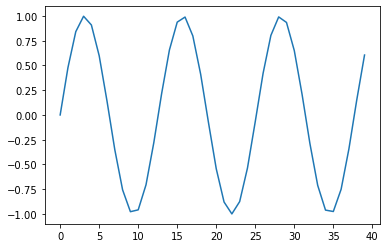

In [3]:
plt.plot(time_series);

If we need to plot multiple datasets one the same plot, we can just keep adding plots on top of each other:

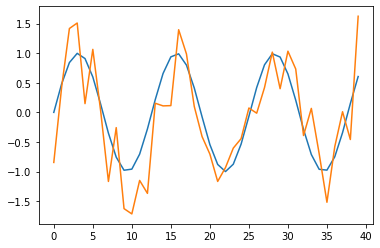

In [4]:
plt.plot(time_series);
plt.plot(time_series_noisy);

As you can see Matplotlib automatically knows that you want to combine different signals, and by default colors them. From here, we can further customize each plot individually, but we are very quickly going to see limits for how to adjust the figure settings. What we really need here is a *handle* for the figure and each plot.

### 3.2.2 Object-based plots

In order to gain more control on the plot, we need to gain control on the elements that constitute it. Those are:
- The ```Figure``` object which contains all elements of the figure
- The ```Axes``` object, the actual plots that belong to a figure object

We can gain this control by explicity creating these objects via the ```subplots()``` function which returns a figure and an axis object:

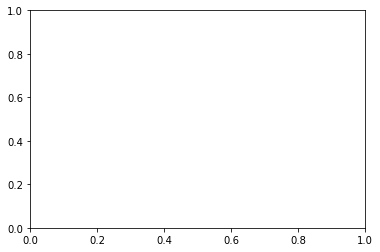

In [5]:
fig, ax = plt.subplots()

We see that we just get an empty figure with axes that we should now fill. For example the ```ax``` object can create an image plot on its own:

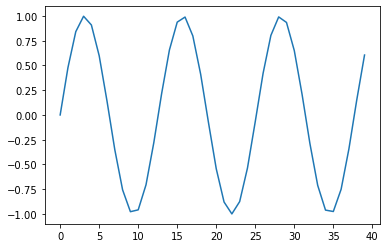

In [6]:
fig, ax = plt.subplots()
ax.plot(time_series);

We can go further and customize other elements of the plot. Again, this is only possible because we have reference to the "plot-objects". For example we can add labels:

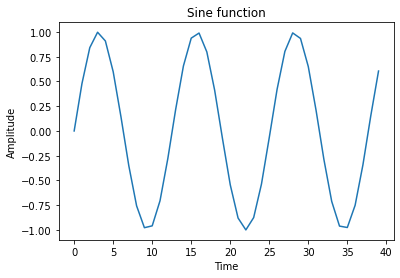

In [7]:
fig, ax = plt.subplots()
plt.plot(time_series);
ax.set_xlabel('Time')
ax.set_ylabel('Amplitude');
ax.set_title('Sine function');

We can also superpose multiple plots. As we want all of them to share the same axis, we use the same ```ax``` reference. For example we can add a line plot:

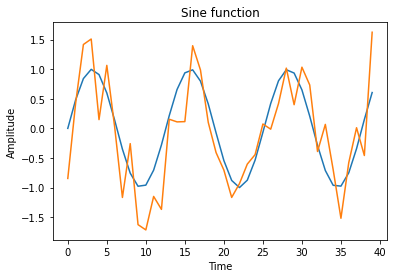

In [8]:
fig, ax = plt.subplots()
ax.plot(time_series);
ax.plot(time_series_noisy);
ax.set_xlabel('Time')
ax.set_ylabel('Amplitude');
ax.set_title('Sine function');

And finally we can export our image as an independent picture using the ```fig``` reference:

In [9]:
fig.savefig('My_first_plot.png')

### 3.2.3 Grids

Using the sort of syntax described above it is very easy to crate complex plots with multiple panels. The simplest solution is to specify a *grid* of plots when creating the figure using ```plt.subplots()```. This provides a list of ```Axes``` objects, each corresponding to one element of the grid:

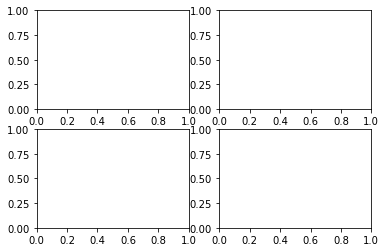

In [10]:
fig, ax = plt.subplots(2,2)

Here ```ax``` is now a 2D numpy array whose elements are ```Axis``` objects:

In [11]:
type(ax)

numpy.ndarray

In [12]:
ax.shape

(2, 2)

We access each element of the ```ax``` array like a regular list and use them to plot:

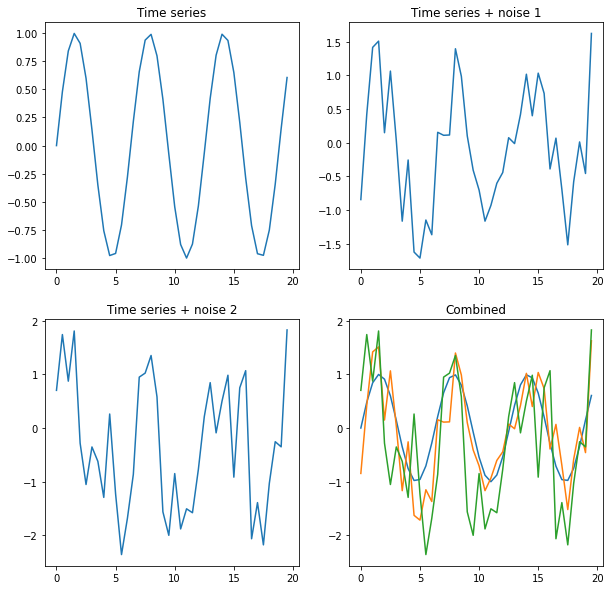

In [13]:
# we create additional data
time_series_noisy2 = time_series + np.random.normal(0,1,len(time_series))# create figure with 2x2 subplots
time_series_noisy3 = time_series + np.random.normal(0,1.5,len(time_series))# create figure with 2x2 subplots

# create the figure and axes
fig, ax = plt.subplots(2,2, figsize=(10,10))

# fill each subplot
ax[0,0].plot(time, time_series);
ax[0,1].plot(time, time_series_noisy);
ax[1,0].plot(time, time_series_noisy2);

# in the last plot, we combined all plots
ax[1,1].plot(time, time_series);
ax[1,1].plot(time, time_series_noisy);
ax[1,1].plot(time, time_series_noisy2);

# we can add titles to subplots
ax[0,0].set_title('Time series')
ax[0,1].set_title('Time series + noise 1')
ax[1,0].set_title('Time series + noise 2')
ax[1,1].set_title('Combined');

An alternative is to use ```add_subplot```. Here we only create a figure, and progressively add new subplots in a pre-determined grid. This variant is useful when programmatically creating a figure, as it easily allows to create plots in a loop:

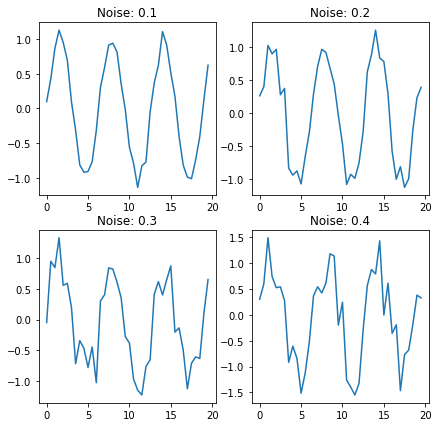

In [14]:
# create a figure
fig = plt.figure(figsize=(7,7))
for x in range(1,5):
    # add subplot and create an axis
    ax = fig.add_subplot(2,2,x)
    # plot the histogram in the axis
    ax.plot(time, time_series + np.random.normal(0,x/10, len(time)))
    # customize axis
    ax.set_title(f'Noise: {x/10}')

## 3.3 Plot types

There is an extensive choice of plot types available in Matplotlib. Here we limit the presentation to the three most common ones: line plot, histogram and image.

### 3.3.1 Line plot

We have already seen line plots above, but we didn't customize the plot itself. A 1D array can simply be plotted by using:

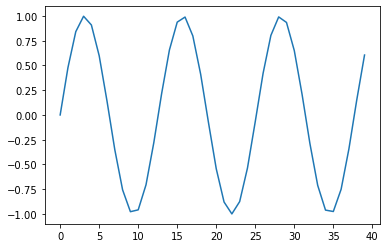

In [15]:
plt.plot(time_series);

This generates by default a line plot where the x-axis simply uses the array index and the array itself is plotted as y-axis. We can explicitly specify the x-axis by passing first x-axis array, here the ```time``` array:

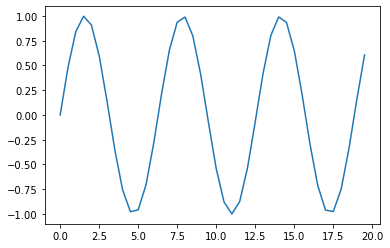

In [16]:
plt.plot(time, time_series);

Each Matplotlib plot can be extensively customized. We only give here a few examples of what can be done. For example, we can change the plot color (for a list of named colors see [here](https://matplotlib.org/3.1.0/gallery/color/named_colors.html)), and add markers (for a list of markers see [here](https://matplotlib.org/3.1.1/api/markers_api.html)):

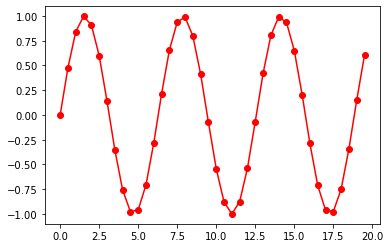

In [17]:
plt.plot(time, time_series, color='red', marker='o');

Conveniently, several of this styling options can be added in a short form. In this example we can specify that we want a line (```-```), markers (```o```) and the color red (```r```) using ```-or```:

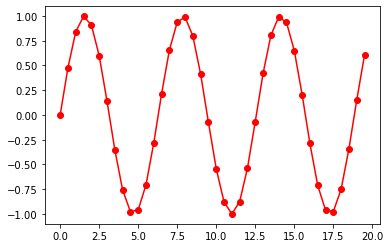

In [18]:
plt.plot(time, time_series, '-or');

Of course if the data are not representing a continuous signal but just a cloud of points, we can skip the line argument to obtain a scatter plot. You can also directly use the ```plt.scatter()``` function:

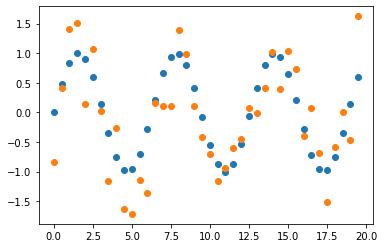

In [19]:
plt.plot(time, time_series, 'o');
plt.plot(time, time_series_noisy, 'o');

### 3.3.2 Histogram

To get an idea of the contents of an array, it is very common to plot a histogram of it. This can be done with the ```plt.hist()``` function:

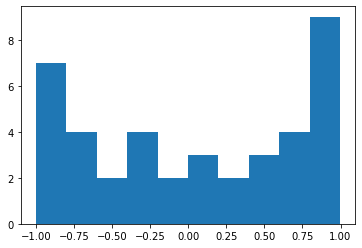

In [20]:
plt.hist(time_series);

Matplotlib selects bins for you, but most of the time you'll want to change those. The simplest is just to specify all bins using ```np.arange()```:

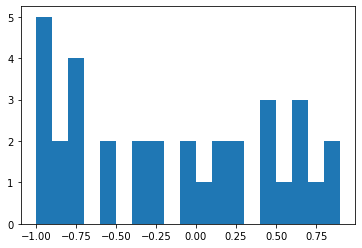

In [21]:
plt.hist(time_series, bins = np.arange(-1,1,0.1));

Just like for line plots, you can superpose histograms. However they will overlap, so you may want to fix the transparency of the additional layers with the ```alpha``` parameter:

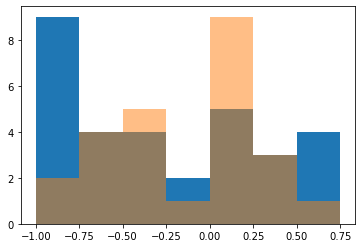

In [22]:
plt.hist(time_series, bins = np.arange(-1,1,0.25));
plt.hist(time_series_noisy, bins = np.arange(-1,1,0.25), alpha = 0.5);

And also as demonstrated before you can adjust the settings of your figure, by creating figure and axis objects:

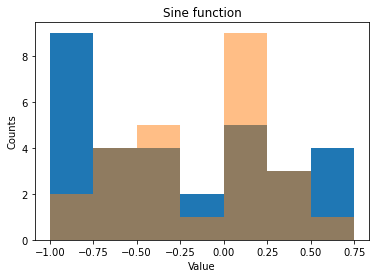

In [23]:
fig, ax = plt.subplots()
ax.hist(time_series, bins = np.arange(-1,1,0.25));
ax.hist(time_series_noisy, bins = np.arange(-1,1,0.25), alpha = 0.5);
ax.set_xlabel('Value')
ax.set_ylabel('Counts');
ax.set_title('Sine function');

### 3.3.4 Image plot

Finally, we often need to look at 2D arrays. These can of course be 2D functions but most of the time they are images. We can again create synthetic data with Numpy. First we create a two 2D grids that contain the x,y indices of each element:

In [24]:
xindices, yindices = np.meshgrid(np.arange(20), np.arange(20))

Then we can crete an array that contains the euclidian distance from a given point $d = ((x-x_0)^2 + (y-y_0)^2)^{1/2}$

In [25]:
centerpoint = [5,8]
dist = ((xindices - centerpoint[0])**2 + (yindices - centerpoint[1])**2)**0.5

If we want to visualize this array, we can then use ```plt.imshow()```:

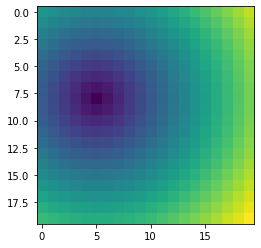

In [26]:
plt.imshow(dist);

Like the other functions ```plt.imshow()``` has numerous options to adjust the image aspect. For example one can change the default colormap, or the aspect ratio of the image:

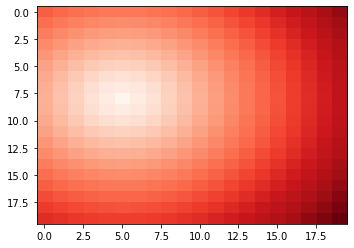

In [27]:
plt.imshow(dist, cmap='Reds', aspect=0.7);

Finally, one can mix different types of plot. We can for example add our line plot from the beginning on top of the image:

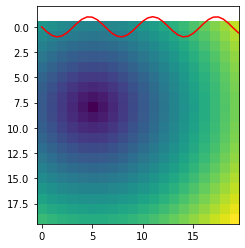

In [28]:
plt.imshow(dist)
plt.plot(time, time_series, color = 'r')